#### Name: Priyal Dalwadi
#### Roll No.: 19BCE041
#### Course : Machine Learning
#### Course Code : 2CS501
#### Practical : 4
### <span style='color:green'>Aim : Linear Regression with Regularization (without using sklearn or equivalent library) and Simple and Multiple Linear Regression with and without regularization using Sklearn.</span>

### <span style='color:red'>Multiple Linear regression using Gradient Descent Method with Regularization.</span>

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

#### Boston Dataset: We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset.

In [2]:
x, y = datasets.load_boston(return_X_y=True)

#### <span style='color:blue'>Training dataset</span>

In [3]:
x_training=np.ones((400,x.shape[1]+1))
x_training[:,1:]=x[0:400,:]
y_training=y[0:400]

#### <span style='color:blue'>Testing dataset</span>

In [4]:
temp=x[400:506,:]
x_testing=np.ones((temp.shape[0],temp.shape[1]+1))
x_testing[:,1:]=temp
y_testing=y[400:506]

In [5]:
scaler=StandardScaler()
scaler.fit(x_training[:,1:])
x_training[:,1:]=scaler.transform(x_training[:,1:])
x_testing[:,1:]=scaler.transform(x_testing[:,1:])

In [6]:
theta=np.random.uniform(0,1,size=(x_training.shape[1]))
no_Of_Iteration = 1000
learning_rate = 0.01
n=[]
costFunction=[]
lambda1=10

In [7]:
for i in range(no_Of_Iteration):
    temp = np.zeros(x_training.shape[1])
    y_predicted = np.dot(x_training,theta)
    error = y_predicted - y_training
    for j in range(x_training.shape[1]):
        temp[j] = np.sum(np.dot(error, x_training[:,j]))
    theta[0]=theta[0]-(1/x_training.shape[0])*learning_rate*temp[0]
    theta[1:]=theta[1:]*(1-(learning_rate*lambda1)/x_training.shape[0])-(1/x_training.shape[0])*learning_rate*temp[1:]
    n.append(i+1)
    c=np.sum(np.dot(y_predicted-y_training,(y_predicted-y_training).T))
    costFunction.append(c/(2*x_training.shape[0]))

In [8]:
y_predicted=np.dot(x_testing,theta)
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_true=y_testing, y_pred=y_predicted))
print('Mean Squared Error: ',metrics.mean_squared_error(y_true=y_testing, y_pred=y_predicted))

Mean Absolute Error:  4.689199876752385
Mean Squared Error:  31.80127558390843


Text(0, 0.5, 'Cost Function')

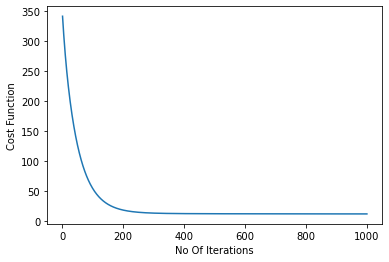

In [9]:
plt.plot(np.array(n),np.array(costFunction))
plt.xlabel('No Of Iterations')
plt.ylabel('Cost Function')

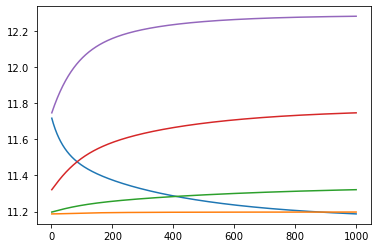

In [12]:
lambda2=[0,10,25,60,100]
costt=[]
num=[]
for l in lambda2:
    n2=[]
    cost2=[]
    for i in range(no_Of_Iteration):
        temp = np.zeros(x_training.shape[1])
        y_predicted = np.dot(x_training,theta)
        error = y_predicted - y_training
        for j in range(x_training.shape[1]):
            temp[j] = np.sum(np.dot(error, x_training[:,j]))
        theta[0]=theta[0]-(1/x_training.shape[0])*learning_rate*temp[0]
        theta[1:]=theta[1:]*(1-(learning_rate*l)/x_training.shape[0])-(1/x_training.shape[0])*learning_rate*temp[1:]
        n2.append(i+1)
        c=np.sum(np.dot(y_predicted-y_training,(y_predicted-y_training).T))
        cost2.append(c/(2*x_training.shape[0]))
    num.append(n2)
    costt.append(cost2)
for i,j in zip(num,costt):
    plt.plot(i,j)

### <span style='color:red'>Multiple Linear regression using Normal Equation Method with Regularization.</span>

In [40]:
lambda1=10000
regularization_matrix=np.zeros((x_training.shape[1],x_training.shape[1]))
for i in range(1,x_training.shape[1]):
    regularization_matrix[i,i]=lambda1
i = inv(np.dot(x_training.T,x_training)+regularization_matrix)
theta = i.dot(x_training.T).dot(y_training)
y_predicted = np.dot(theta,x_testing.T)

In [41]:
print('Theta: ',theta)
print('\nTesting_Y: ',y_testing)
print('\nPredicted_Y: ',y_predicted)

Theta:  [ 2.43345000e+01 -7.96694093e-02  9.28356706e-02 -1.10807533e-01
  5.05219573e-02 -8.67030786e-02  2.50251939e-01 -7.91092079e-02
  1.97502306e-02 -5.01975784e-02 -9.06711031e-02 -1.42218775e-01
  4.42007225e-02 -2.27809584e-01]

Testing_Y:  [ 5.6  7.2 12.1  8.3  8.5  5.  11.9 27.9 17.2 27.5 15.  17.2 17.9 16.3
  7.   7.2  7.5 10.4  8.8  8.4 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9
 11.   9.5 14.5 14.1 16.1 14.3 11.7 13.4  9.6  8.7  8.4 12.8 10.5 17.1
 18.4 15.4 10.8 11.8 14.9 12.6 14.1 13.  13.4 15.2 16.1 17.8 14.9 14.1
 12.7 13.5 14.9 20.  16.4 17.7 19.5 20.2 21.4 19.9 19.  19.1 19.1 20.1
 19.9 19.6 23.2 29.8 13.8 13.3 16.7 12.  14.6 21.4 23.  23.7 25.  21.8
 20.6 21.2 19.1 20.6 15.2  7.   8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3
 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]

Predicted_Y:  [22.43544167 22.91819186 22.97915986 22.4686105  22.00629042 21.87367336
 21.97040247 22.9263475  22.54479179 22.94309641 22.21332925 22.6767688
 21.47085195 22.19955539 20.97934861 22.21490257 22

In [39]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_true=y_testing, y_pred=y_predicted))
print('Mean Squared Error: ',metrics.mean_squared_error(y_true=y_testing, y_pred=y_predicted))

Mean Absolute Error:  7.5565997545922965
Mean Squared Error:  76.24464991303995
